In [2]:
# !pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import regularizers
import cv2
import tensorflow.keras as keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation, Add, Input, ZeroPadding2D, AveragePooling2D

# **Pre Trained Model Inception_V1**

In [ ]:
model = InceptionV3(weights='imagenet')

In [ ]:
def preprocess2(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

In [ ]:
def inception(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (299,299))

  display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  display_img = Image.fromarray(display_img)  
  
  img = np.array(img)
  img = preprocess_input(img)
  # img = preprocess2(img)
  img = img.reshape(1,299,299,3)
  prediction = model.predict(img)
  output = decode_predictions(prediction)[0]
  plt.imshow(display_img)

  return f'Predicted: {output}'

"Predicted: [('n01443537', 'goldfish', 0.9104356), ('n02607072', 'anemone_fish', 0.008373199), ('n02655020', 'puffer', 0.0030918045), ('n02606052', 'rock_beauty', 0.0029096603), ('n02701002', 'ambulance', 0.0018836645)]"

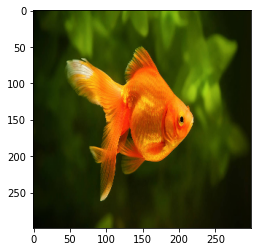

In [ ]:
inception('/content/gold-fish-1.jpg')

"Predicted: [('n01491361', 'tiger_shark', 0.98856676), ('n01484850', 'great_white_shark', 0.0040514846), ('n04141975', 'scale', 0.0010408581), ('n01494475', 'hammerhead', 8.507848e-05), ('n02085936', 'Maltese_dog', 4.8037993e-05)]"

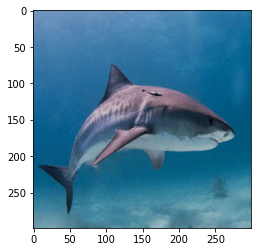

In [ ]:
inception('/content/1200px-Tiger_shark.jpg')

# **Transfer Learning Inception V1**

In [4]:
import os

In [5]:
# os.listdir('/content/drive/MyDrive/Cotton_Disease_Dataset/Cotton Disease')

In [6]:
# label = os.listdir('/content/drive/MyDrive/Cotton_Disease_Dataset/Cotton Disease/train')

In [7]:
base_path = '/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train/'

def preprocess(base_path):
  image_paths = []
  labels_lst = []
  labels = os.listdir(base_path) 
  for i in labels:
    filenames = os.listdir(base_path + i)
    
    for j in filenames:
      path = base_path + i + '/' + j
      labels_lst.append(i)
      image_paths.append(path)

  df = pd.DataFrame({'image_path':image_paths, 'labels':labels_lst})

  return df

In [8]:
df_train = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train/')
df_test = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/test/')
df_valid = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/valid/')

In [9]:
df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)
df_valid = df_valid.sample(frac=1)

In [10]:
df_train.shape

(9285, 2)

In [11]:
# df_train['labels'] = df_train['labels'].map({'diseased cotton leaf':0, 'diseased cotton plant':1, 'fresh cotton leaf':2, 'fresh cotton plant':3})
# df_test['labels'] = df_test['labels'].map({'diseased cotton leaf':0, 'diseased cotton plant':1, 'fresh cotton leaf':2, 'fresh cotton plant':3})
# df_val['labels'] = df_val['labels'].map({'diseased cotton leaf':0, 'diseased cotton plant':1, 'fresh cotton leaf':2, 'fresh cotton plant':3})

In [12]:
le = LabelEncoder()

In [13]:
df_train['labels'] = le.fit_transform(df_train['labels'])
df_test['labels'] = le.fit_transform(df_test['labels'])
df_valid['labels'] = le.fit_transform(df_valid['labels'])

In [14]:
def images(df):
  images = []
  count=1
  for i in df['image_path']:
    print(f'{count}/9285')
    img = cv2.imread(i)
    img = cv2.resize(img, (224,224))
    images.append(img)
    count +=1

  return images

In [ ]:
x_test = images(df_test)
x_test = np.array(x_test)

In [ ]:
x_valid = images(df_valid)
x_valid = np.array(x_valid)

In [ ]:
df_train.shape

(9285, 2)

In [ ]:
x_valid.shape

(379, 224, 224, 3)

In [ ]:
x_train = images(df_train)

Streaming output truncated to the last 5000 lines.
4286/9285
4287/9285
4288/9285
4289/9285
4290/9285
4291/9285
4292/9285
4293/9285
4294/9285
4295/9285
4296/9285
4297/9285
4298/9285
4299/9285
4300/9285
4301/9285
4302/9285
4303/9285
4304/9285
4305/9285
4306/9285
4307/9285
4308/9285
4309/9285
4310/9285
4311/9285
4312/9285
4313/9285
4314/9285
4315/9285
4316/9285
4317/9285
4318/9285
4319/9285
4320/9285
4321/9285
4322/9285
4323/9285
4324/9285
4325/9285
4326/9285
4327/9285
4328/9285
4329/9285
4330/9285
4331/9285
4332/9285
4333/9285
4334/9285
4335/9285
4336/9285
4337/9285
4338/9285
4339/9285
4340/9285
4341/9285
4342/9285
4343/9285
4344/9285
4345/9285
4346/9285
4347/9285
4348/9285
4349/9285
4350/9285
4351/9285
4352/9285
4353/9285
4354/9285
4355/9285
4356/9285
4357/9285
4358/9285
4359/9285
4360/9285
4361/9285
4362/9285
4363/9285
4364/9285
4365/9285
4366/9285
4367/9285
4368/9285
4369/9285
4370/9285
4371/9285
4372/9285
4373/9285
4374/9285
4375/9285
4376/9285
4377/9285
4378/9285
4379/9285
4380/9285

In [ ]:
x_train = np.array(x_train)

In [ ]:
x_train.shape

(9285, 224, 224, 3)

In [ ]:
x_train.ndim

4

In [ ]:
pwd

'/content'

In [16]:
cd /content/drive/MyDrive/75 Butterfly Species/75 Butterfly

/content/drive/MyDrive/75 Butterfly Species/75 Butterfly


In [ ]:
# import pickle

In [ ]:
# output = open('x_valid.pkl', 'wb')
# pickle.dump(x_valid, output)
# output.close()

In [19]:
import pprint, pickle

pkl_file = open('x_test.pkl', 'rb')

x_test = pickle.load(pkl_file)
pprint.pprint(x_test)

pkl_file.close()

array([[[[231, 240, 250],
         [226, 236, 246],
         [225, 241, 248],
         ...,
         [193, 210, 229],
         [170, 194, 214],
         [164, 189, 209]],

        [[230, 239, 249],
         [225, 236, 244],
         [224, 237, 245],
         ...,
         [197, 214, 235],
         [170, 194, 214],
         [168, 193, 213]],

        [[235, 244, 253],
         [230, 239, 248],
         [227, 238, 246],
         ...,
         [193, 211, 234],
         [170, 191, 213],
         [164, 187, 209]],

        ...,

        [[124, 148, 176],
         [164, 187, 213],
         [177, 199, 224],
         ...,
         [192, 222, 251],
         [150, 189, 221],
         [101, 146, 179]],

        [[ 38,  63,  95],
         [ 59,  82, 114],
         [ 56,  77, 108],
         ...,
         [195, 229, 255],
         [153, 196, 229],
         [134, 182, 216]],

        [[ 52,  79, 113],
         [ 57,  82, 116],
         [ 47,  68, 100],
         ...,
         [154, 191, 219],
        

In [20]:
x_train.shape

(9285, 224, 224, 3)

In [21]:
x_valid.shape

(379, 224, 224, 3)

In [22]:
y_train = df_train['labels'].values
y_test = df_test['labels'].values
y_valid = df_valid['labels'].values

In [23]:
y_valid

array([74, 50, 41, 46, 72,  5, 14, 69,  0, 21, 27,  9, 18, 20,  0, 44, 30,
       39, 57, 54, 52, 65, 63, 47, 42, 37,  8, 10, 73, 38, 46, 70, 74, 66,
       21, 13, 42, 51,  1, 13, 61,  6, 51, 42, 60, 69,  9, 64, 20,  4, 33,
       51, 31, 45, 67, 15, 53, 72, 13, 50, 12, 62, 43, 14, 14, 47,  8,  6,
       56, 18, 16, 11, 52, 36,  3,  0, 64, 34, 65, 62, 21, 12, 58, 24, 51,
       12, 45,  2, 35, 60, 17, 61, 30, 53, 33, 48, 43, 66, 58, 27, 52, 29,
       36, 26, 19, 71, 48, 68, 65, 74, 36, 22, 46,  3, 23, 60, 20, 34, 30,
       12,  6, 63, 73, 47, 62,  8, 40, 18, 25, 67, 73, 57, 63, 49, 27, 48,
       68, 20, 36, 33, 26, 45,  7, 14,  0, 14, 30, 44, 54, 58, 69, 32, 24,
       15, 38, 32, 12, 36,  6, 44, 40, 29, 33, 64, 56,  4, 65, 44, 30, 47,
       39,  8, 46, 52, 64, 42, 10, 41, 50,  5, 37, 63, 37,  8, 62, 34, 67,
       24, 71,  1, 49, 15,  5, 57, 21, 54,  9,  4, 73, 32, 18, 34, 16,  4,
       20, 23, 28, 57, 45, 48, 74, 10, 29, 13, 12, 58, 22, 31, 55, 28, 32,
       17, 25, 66, 25, 35

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:
earlystopping = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                                           verbose=1, min_lr=0.00001)

callbacks = [earlystopping, learning_rate_reduction]

In [ ]:
inception_model = Sequential()

pretrained_model = InceptionV3(include_top=False, input_shape = (299,299,3),
                               weights='imagenet',pooling='avg',classes=4)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pretrained_model.layers:
        layer.trainable=False

In [ ]:
inception_model.add(pretrained_model)

In [ ]:
inception_model.add(Flatten())
# inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dropout(0.4))
inception_model.add(Dense(4, activation='softmax'))

In [ ]:
inception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
inception_model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = inception_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=80, callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 30s 463ms/step - loss: 1655.5582 - accuracy: 0.2988 - val_loss: 1206.1580 - val_accuracy: 0.4783 - lr: 0.0100
Epoch 2/100
25/25 [==============================] - 7s 282ms/step - loss: 992.1570 - accuracy: 0.4152 - val_loss: 1697.9259 - val_accuracy: 0.2648 - lr: 0.0100
Epoch 3/100
25/25 [==============================] - 7s 284ms/step - loss: 991.2056 - accuracy: 0.4177 - val_loss: 867.9838 - val_accuracy: 0.5178 - lr: 0.0100
Epoch 4/100
25/25 [==============================] - 7s 286ms/step - loss: 893.5195 - accuracy: 0.4285 - val_loss: 1716.2572 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 5/100
25/25 [==============================] - 7s 288ms/step - loss: 666.8674 - accuracy: 0.4808 - val_loss: 703.8694 - val_accuracy: 0.6166 - lr: 0.0100
Epoch 6/100
25/25 [==============================] - 7s 291ms/step - loss: 645.4026 - accuracy: 0.4736 - val_loss: 565.2256 - val_accuracy: 0.5257 - lr: 0.0100
Epoch 7/100
25/25 [================

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(49)
plt.plot(epochs, acc)
plt.plot(epochs, val)

plt.show()

# **Custom Training Inception V1**

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
def inception_module(x, 
                 filter_1x1,
                 filter_3x3_red,
                 filter_3x3,
                 filter_5x5_red,
                 filter_5x5,
                 pool_filter,
                 name=None
                 ):
  conv_1x1 = Conv2D(filters=filter_1x1, kernel_size=(1,1), strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)

  conv_3x3 = Conv2D(filters=filter_3x3_red, kernel_size=(1,1), strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)
  conv_3x3 = BatchNormalization()(conv_3x3)
  conv_3x3 = Conv2D(filters=filter_3x3, kernel_size=(3,3), strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(conv_3x3)

  conv_5x5 = Conv2D(filters=filter_5x5_red, kernel_size=(1,1), strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)
  conv_5x5 = BatchNormalization()(conv_5x5)
  conv_5x5 = Conv2D(filters=filter_5x5, kernel_size=(5,5), strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(conv_5x5)

  pool_proj = MaxPooling2D(pool_size=3, strides=1, padding='same')(x)
  pool_proj = Conv2D(filters = pool_filter, kernel_size=1, strides=(1,1), padding='same', activation='relu')(pool_proj)

  output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)

  return output


In [ ]:
input_layer = Input(shape=(224,224,3))

x = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu', name='conv_7x7/2', 
           kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(input_layer)
x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2), name='maxpool_1_3x3/2')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(1,1),strides= 1, padding='valid', activation='relu', name='conv_1x1/1',
           kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)
x = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu', name='conv_3x3/1',
           kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2), name='maxpool_2_3x3/2')(x)

#3a
x = inception_module(x, filter_1x1=64, filter_3x3_red=96, filter_3x3=128, filter_5x5_red= 16, filter_5x5=32, pool_filter= 32, name='inception_module_3a')
#3b
x = inception_module(x, filter_1x1=128, filter_3x3_red=128, filter_3x3=192, filter_5x5_red= 32, filter_5x5=96, pool_filter= 64, name='inception_module_3b')

x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2), name='maxpool_3_3x3/2')(x)

#4a
x = inception_module(x, filter_1x1=192, filter_3x3_red=96, filter_3x3=208, filter_5x5_red= 16, filter_5x5=48, pool_filter= 64, name='inception_module_4a')

#Auxiliary 1
x1 = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
x1 = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu',
            kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(75, activation='softmax', name='auxiliary_1',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x1)

#4b
x = inception_module(x, filter_1x1=160, filter_3x3_red=112, filter_3x3=224, filter_5x5_red= 24, filter_5x5=64, pool_filter= 64, name='inception_module_4b')

#4c
x = inception_module(x, filter_1x1=128, filter_3x3_red=128, filter_3x3=256, filter_5x5_red= 24, filter_5x5=64, pool_filter= 64, name='inception_module_4c')

#4d
x = inception_module(x, filter_1x1=112, filter_3x3_red=144, filter_3x3=288, filter_5x5_red= 32, filter_5x5=64, pool_filter= 64, name='inception_module_4d')

#Auxiliary 2
x2 = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
x2 = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu',
            kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(75, activation='softmax', name='auxiliary_2',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x2)

#4e
x = inception_module(x, filter_1x1=256, filter_3x3_red=160, filter_3x3=320, filter_5x5_red= 32, filter_5x5=128, pool_filter= 128, name='inception_module_4e')

x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2), name='maxpool_4_3x3/2')(x)


#5a
x = inception_module(x, filter_1x1=256, filter_3x3_red=160, filter_3x3=320, filter_5x5_red= 32, filter_5x5=128, pool_filter= 128, name='inception_module_5a')


#5b
x = inception_module(x, filter_1x1=384, filter_3x3_red=192, filter_3x3=384, filter_5x5_red= 48, filter_5x5=128, pool_filter= 128, name='inception_module_5b')


# x = AveragePooling2D(pool_size=(7,7), strides=1, padding='same')(x)
x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
x = BatchNormalization()(x)
# x = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(x)
x = Flatten()(x)
x = Dense(1024, activation='relu',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(75, activation='softmax', name='output',kernel_regularizer=regularizers.L2(0.01), bias_regularizer= regularizers.L2(0.01))(x)



In [ ]:
model = Model(input_layer, [x,x1,x2])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_7x7/2 (Conv2D)            (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 maxpool_1_3x3/2 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv_7x7/2[0][0]']             
                                                                                            

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(clipvalue=0.5)

In [ ]:
model.compile(optimizer=optimizer,loss=['sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy'],metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, [y_train, y_train, y_train], validation_data=(x_valid, [y_valid, y_valid, y_valid]), epochs=1000, batch_size=190, callbacks=callbacks)


In [ ]:
model.evaluate(x_test, y_test, batch_size=64)

2/2 [==============================] - 1s 118ms/step - loss: 39.3245 - output_loss: 2.6156 - auxiliary_1_loss: 4.4670 - auxiliary_2_loss: 4.0615 - output_accuracy: 0.5660 - auxiliary_1_accuracy: 0.5660 - auxiliary_2_accuracy: 0.5283


[39.324485778808594,
 2.615612745285034,
 4.467001438140869,
 4.0615034103393555,
 0.5660377144813538,
 0.5660377144813538,
 0.5283018946647644]

In [ ]:
model.save('custom_inceptionV1_model.h5')
model.save_weights('custom_inceptionv1_model2.h5')

In [ ]:
model_json = model.to_json()
with open("custom_inceptionv1_model3.json", "w") as json_file:
    json_file.write(model_json)

# **Custom Dataset Inception V3**

In [64]:
def conv_bn(x, filters, rows, columns, padding='same', strides=(1,1)):
  x = Conv2D(filters, (rows, columns),strides=strides,padding=padding,
             kernel_regularizer = regularizers.L2(0.01),
             bias_regularizer = regularizers.L2(0.01))(x)
  x = BatchNormalization(axis=3)(x)
  x = Dropout(0.4)(x)
  x = Activation('relu')(x)
  return x

In [65]:
#Inception Module A

def inceptionA(x):
  branch1 = conv_bn(x, 64,1,1)

  branch2 = conv_bn(x, 48,1,1)
  branch2 = conv_bn(branch2, 64,3,3)

  branch3 = conv_bn(x, 64,1,1)
  branch3 = conv_bn(branch3, 96,3,3)
  branch3 = conv_bn(branch3, 96,3,3)

  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
  branch4 = conv_bn(branch4, 32,1,1)

  output = concatenate([branch1, branch2, branch3, branch4], axis=3)
  return output

In [66]:
#Reduction block A
def reductionA(x):
  branch1 = MaxPooling2D((3,3), strides=2, padding='same')(x)

  branch2 = conv_bn(x, 384,3,3, strides=2)

  branch3 = conv_bn(x, 64,1,1)
  branch3 = conv_bn(branch3, 96,3,3)
  branch3 = conv_bn(branch3, 96,3,3, strides=(2,2))

  output = concatenate([branch1, branch2, branch3], axis=3)
  return output

In [67]:
#Inception Block B
def inceptionB(x):
  branch1 = conv_bn(x, 192,1,1)

  branch2 = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
  branch2 = conv_bn(branch2, 192,1,1)

  branch3 = conv_bn(x, 128,1,1)
  branch3 = conv_bn(branch3, 128,1,7)
  branch3 = conv_bn(branch3, 192, 7,1)

  branch4 = conv_bn(x, 128,1,1)
  branch4 = conv_bn(branch4, 128,7,1)
  branch4 = conv_bn(branch4, 128,1,7)
  branch4 = conv_bn(branch4, 128,7,1)
  branch4 = conv_bn(branch4, 192,1,7)

  output = concatenate([branch1, branch2, branch3, branch4], axis=3)
  return output

In [68]:
def reductionB(x):
  branch1 = MaxPooling2D((3,3), strides=2)(x)

  branch2 = conv_bn(x, 192,1,1)
  branch2 = conv_bn(branch2, 320,3,3, strides=2, padding='valid')

  branch3 = conv_bn(x,192, 1,1)
  branch3 = conv_bn(branch3,192, 1,7)
  branch3 = conv_bn(branch3,192, 7,1)
  branch3 = conv_bn(branch3, 192,3,3, strides=2, padding='valid')

  output = concatenate([branch1, branch2, branch3], axis=3)

  return output

In [72]:
def inceptionC(x):
  branch1 = conv_bn(x, 320,1,1)

  branch2 = conv_bn(x, 384,1,1)
  branch2_1 = conv_bn(branch2, 384, 3,3)
  branch2_2 = conv_bn(branch2, 384,3,3)

  branch3 = conv_bn(x, 448,1,1)
  branch3 = conv_bn(branch3, 384, 3,3)
  branch3_1 = conv_bn(branch3, 384, 3,1)
  branch3_2 = conv_bn(branch3, 384, 1,3)

  branch4 = AveragePooling2D((3,3), strides=1, padding='same')(x)
  branch4 = conv_bn(branch4, 192,1,1)

  output = concatenate([branch1, branch2_1, branch2_2, branch3_1, branch3_2, branch4], axis=3)

  return output

In [73]:
input_layer = Input(shape=(224,224,3))

In [74]:
x = conv_bn(x=input_layer, filters=32, rows=3, columns=3, strides=(2,2))
x = conv_bn(x, 32,3,3)
x = conv_bn(x, 64, 3,3)
x = MaxPooling2D((3,3), strides=2)(x)
x = conv_bn(x,80,1,1)
x = conv_bn(x,192,3,3)
x = MaxPooling2D((3,3), strides=2)(x)

x = inceptionA(x)
x = inceptionA(x)
x = inceptionA(x)

x = reductionA(x)

x = inceptionB(x)
x = inceptionB(x)
x = inceptionB(x)
x = inceptionB(x)

x = reductionB(x)

x = inceptionC(x)
x = inceptionC(x)

x = GlobalAveragePooling2D(name='avg_ppol')(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.5) (x)
x = Dense(units=2048, activation='relu',
          kernel_regularizer = regularizers.L2(0.01),
          bias_regularizer = regularizers.L2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.5) (x)
x = Dense(75, activation='softmax', name='output')(x)

model = Model(input_layer, x)

In [79]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=128, callbacks=callbacks)

Epoch 1/100
73/73 [==============================] - 113s 1s/step - loss: 157.2178 - accuracy: 0.0125 - val_loss: 90.2760 - val_accuracy: 0.0132 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 92s 1s/step - loss: 61.3766 - accuracy: 0.0151 - val_loss: 39.7770 - val_accuracy: 0.0132 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - ETA: 0s - loss: 31.6816 - accuracy: 0.0125
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
73/73 [==============================] - 92s 1s/step - loss: 31.6816 - accuracy: 0.0125 - val_loss: 23.6523 - val_accuracy: 0.0132 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 92s 1s/step - loss: 21.7550 - accuracy: 0.0134 - val_loss: 18.5990 - val_accuracy: 0.0132 - lr: 5.0000e-04
Epoch 5/100
73/73 [==============================] - ETA: 0s - loss: 17.5607 - accuracy: 0.0127
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
73/73 [==============================]